In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # for plot styling
import numpy as np
from sklearn.cluster import KMeans


df =pd.read_csv('df-climatechange.csv')

df.head()

,qb1a,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,d25,d8,d63,d7,country,cca
0,Climate change,4,No,2,2,2,2,2,Centre-letf,Man,20,Large town,20+ years old,The middle class of society,Single,Belgium,1
1,The increasing global population,5,No,2,2,2,2,2,Centre-letf,Man,55,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium,1
2,Climate change,6,No,2,2,2,1,1,Centre-letf,Man,80,Large town,Refusal/dk,The lower middle class of society,Single,Belgium,2
3,"Poverty, hunger and lack of drinking water",6,Yes,2,2,2,2,2,Centre,Man,40,Large town,Refusal/dk,The lower middle class of society,Partner and children,Belgium,1
4,Proliferation of nuclear weapons,5,Yes,3,3,2,3,2,Centre,Man,55,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium,2


In [4]:
X = df[['qb4_3','qb4_5','qb7','qb8','qb9']]

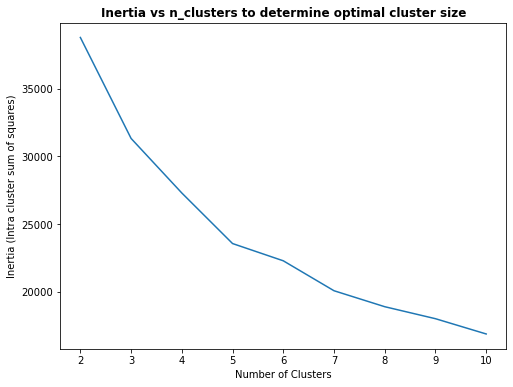

In [5]:
elbow = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    elbow.append(kmeans.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,11), elbow)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Intra cluster sum of squares)')
plt.title('Inertia vs n_clusters to determine optimal cluster size', fontweight='bold')
plt.show()

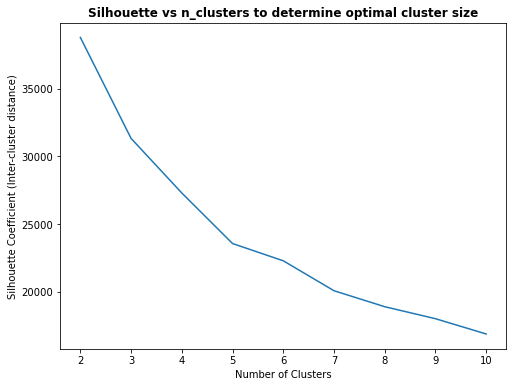

In [6]:

from sklearn.metrics import silhouette_score
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,11), elbow)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient (Inter-cluster distance)')
plt.title('Silhouette vs n_clusters to determine optimal cluster size', fontweight='bold')
plt.show()

the best n_cluster is 2.

In [7]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X)


#save k-means clusters in df
df['k-means']=kmeanModel.predict(X)
df.to_csv('df-climatechange.csv')

#### Plot k-means clustering

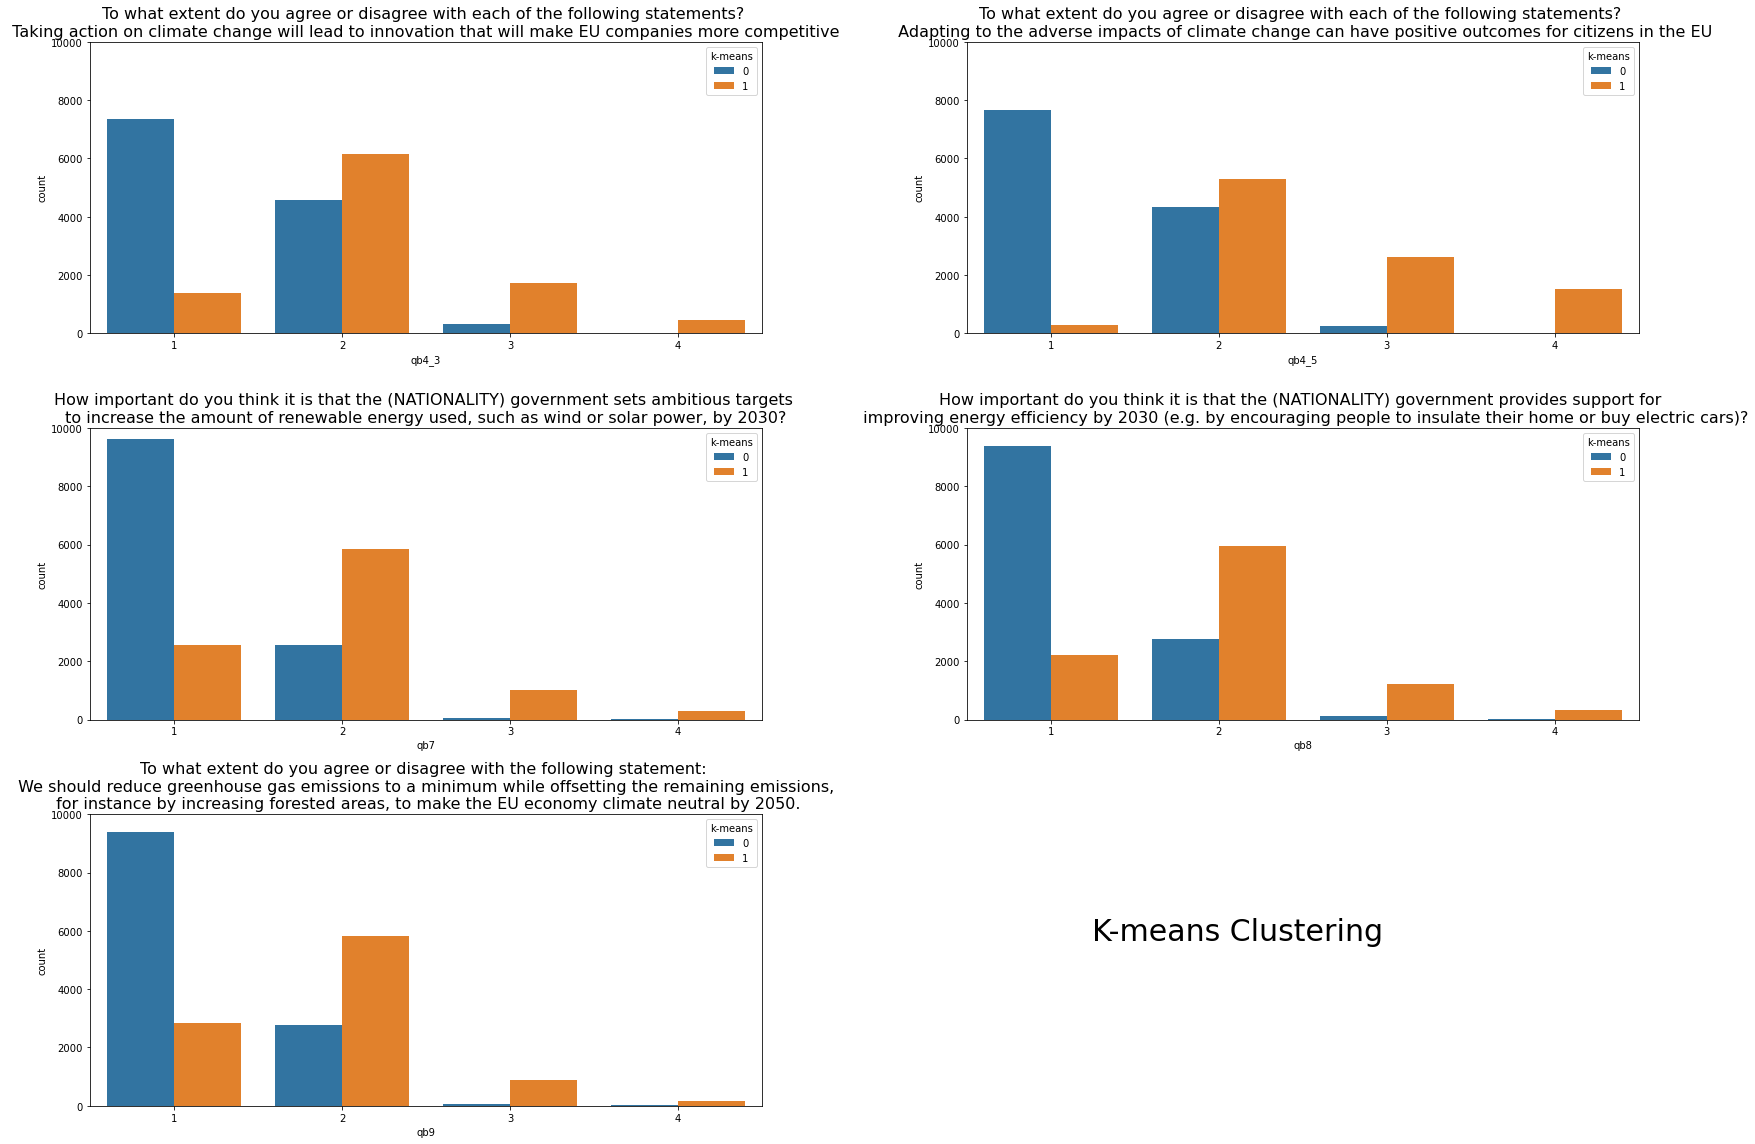

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(3, 2, figsize=(25, 16))

sns.countplot(x=df['qb4_3'],hue=df['k-means'], ax= axes[0, 0]).set_title('To what extent do you agree or disagree with each of the following statements? \n Taking action on climate change will lead to innovation that will make EU companies more competitive ',fontsize=16) 
sns.countplot(x=df['qb4_5'],hue=df['k-means'], ax=axes[0, 1]).set_title("To what extent do you agree or disagree with each of the following statements? \n Adapting to the adverse impacts of climate change can have positive outcomes for citizens in the EU",fontsize=16)
sns.countplot(x=df['qb7'],hue=df['k-means'], ax=axes[1, 0]).set_title("How important do you think it is that the (NATIONALITY) government sets ambitious targets \n to increase the amount of renewable energy used, such as wind or solar power, by 2030? ",fontsize=16)
sns.countplot(x=df['qb8'],hue=df['k-means'],ax= axes[1, 1]).set_title("How important do you think it is that the (NATIONALITY) government provides support for \n improving energy efficiency by 2030 (e.g. by encouraging people to insulate their home or buy electric cars)?",fontsize=16)
sns.countplot(x=df['qb9'],hue=df['k-means'], ax=axes[2, 0]).set_title("To what extent do you agree or disagree with the following statement: \n We should reduce greenhouse gas emissions to a minimum while offsetting the remaining emissions, \n for instance by increasing forested areas, to make the EU economy climate neutral by 2050.",fontsize=16)

axes[0, 0].set_ylim(0,10000)
axes[0, 1].set_ylim(0,10000)
axes[1, 0].set_ylim(0,10000)
axes[1, 1].set_ylim(0,10000)
axes[2, 0].set_ylim(0,10000)

#axes[0, 0].set_xticklabels(['1','2','3','4'])

axes[0, 1].legend(loc = 'upper right', title='k-means')

f.delaxes(axes[2,1]) #The indexing is zero-based here

f.suptitle('K-means Clustering', fontsize = 30, x = 0.7, y = 0.2) 


plt.tight_layout()

plt.savefig('k-means_clustering.png')
plt.show()

##### Plot Correlational Class Analysis

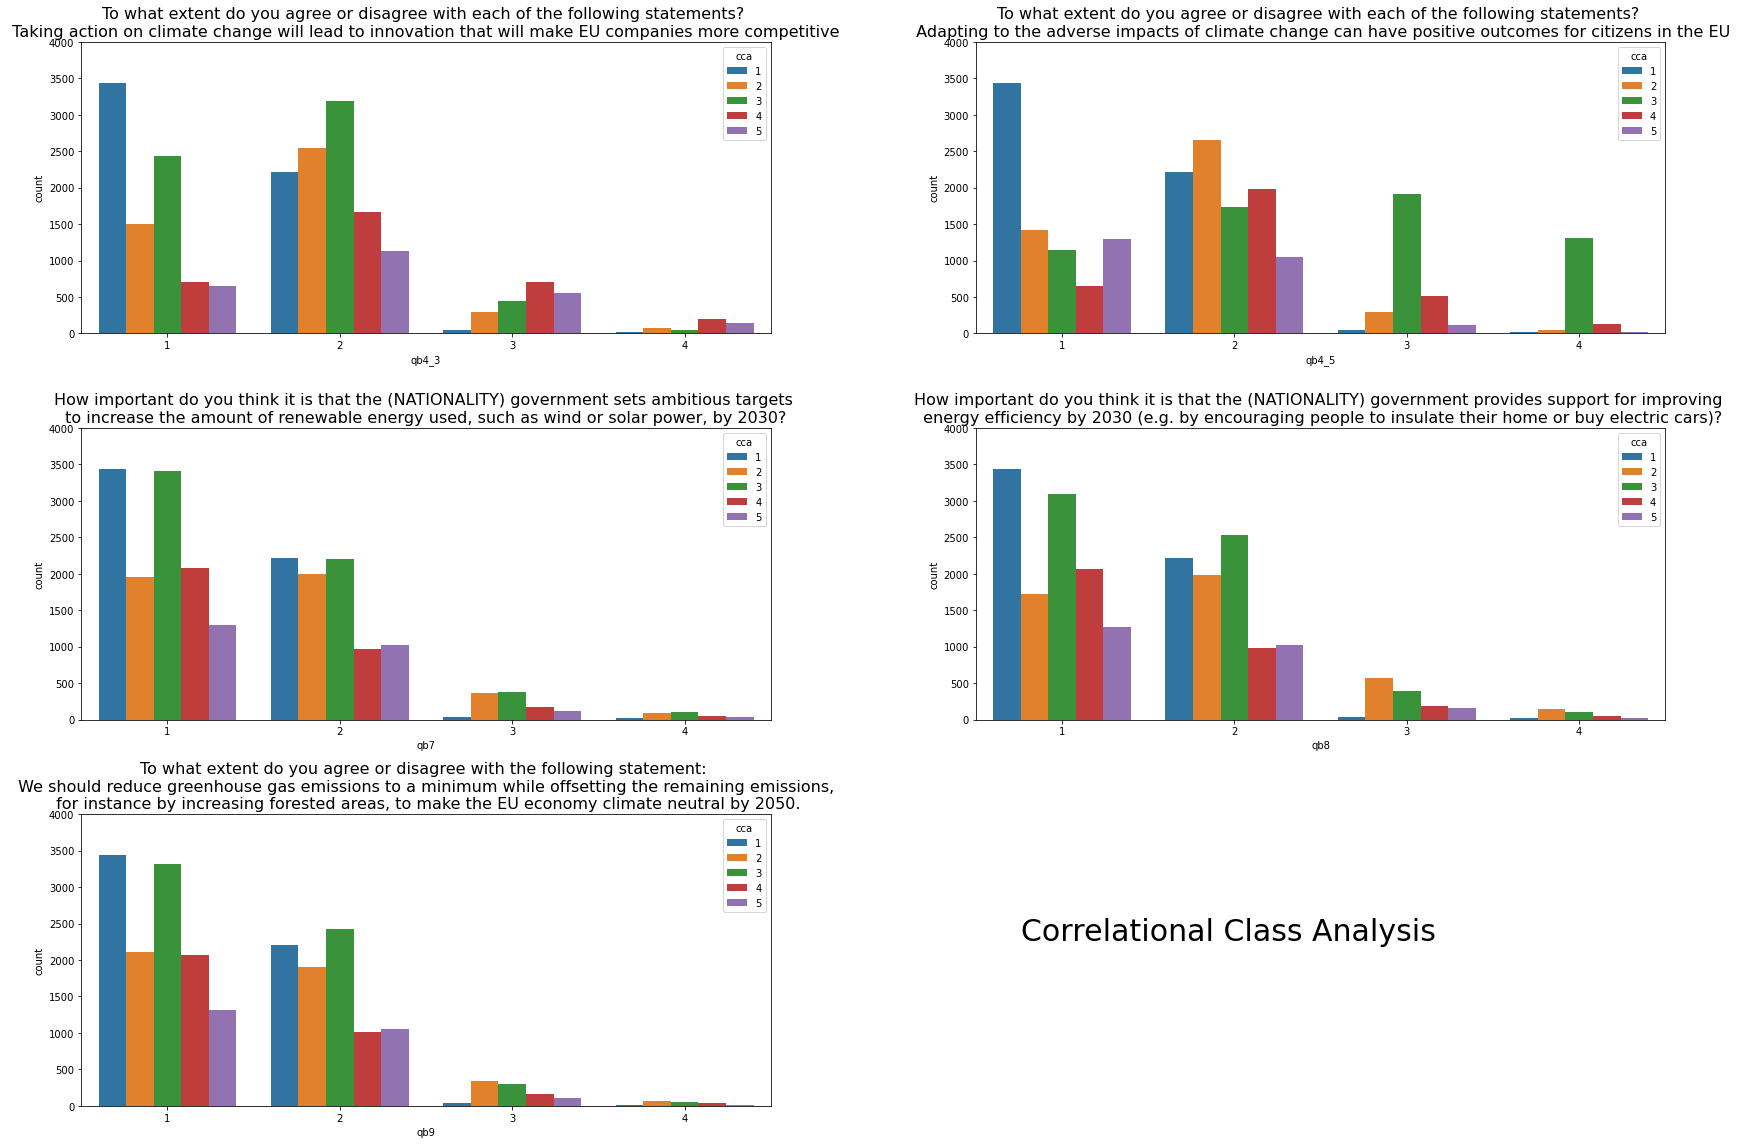

In [17]:
f, axes = plt.subplots(3, 2, figsize=(25, 16))

sns.countplot(x=df['qb4_3'],hue=df['cca'], ax= axes[0, 0]).set_title('To what extent do you agree or disagree with each of the following statements? \n Taking action on climate change will lead to innovation that will make EU companies more competitive ',fontsize=16) 
sns.countplot(x=df['qb4_5'],hue=df['cca'], ax=axes[0, 1]).set_title("To what extent do you agree or disagree with each of the following statements? \n Adapting to the adverse impacts of climate change can have positive outcomes for citizens in the EU",fontsize=16)
sns.countplot(x=df['qb7'],hue=df['cca'], ax=axes[1, 0]).set_title("How important do you think it is that the (NATIONALITY) government sets ambitious targets \n to increase the amount of renewable energy used, such as wind or solar power, by 2030? ",fontsize=16)
sns.countplot(x=df['qb8'],hue=df['cca'],ax= axes[1, 1]).set_title("How important do you think it is that the (NATIONALITY) government provides support for improving \n energy efficiency by 2030 (e.g. by encouraging people to insulate their home or buy electric cars)?",fontsize=16)
sns.countplot(x=df['qb9'],hue=df['cca'], ax=axes[2, 0]).set_title("To what extent do you agree or disagree with the following statement: \n We should reduce greenhouse gas emissions to a minimum while offsetting the remaining emissions, \n for instance by increasing forested areas, to make the EU economy climate neutral by 2050.",fontsize=16)

axes[0, 0].set_ylim(0,4000)
axes[0, 1].set_ylim(0,4000)
axes[1, 0].set_ylim(0,4000)
axes[1, 1].set_ylim(0,4000)
axes[2, 0].set_ylim(0,4000)

axes[0, 1].legend(loc = 'upper right', title='cca')

f.delaxes(axes[2,1]) #The indexing is zero-based here
f.suptitle('Correlational Class Analysis', fontsize = 30, x = 0.7, y = 0.2) 


plt.tight_layout()

plt.savefig('cca.png')
plt.show()

### SOURCE

https://towardsdatascience.com/opening-the-black-box-of-clustering-kmeans-e970062ff415